# Tratamento de Dados

## Analise de dados exploratória

In [1]:
import pandas as pd
import seaborn as srn # Biblioteca para graficos
import statistics as sts

In [2]:
dataset = pd.read_csv('Churn.csv', sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
# tamanho
dataset.shape

(999, 12)

In [4]:
# nomeando as colunas
dataset.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 
                   'Salario', 'Saiu']

In [5]:
# visualizando
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
# explorando dados categoricos
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

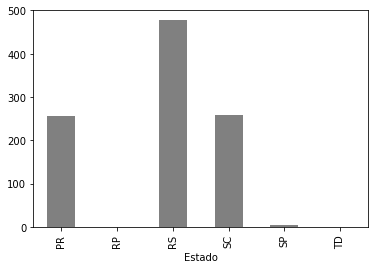

In [7]:
# gerando o grafico por estado
agrupado.plot.bar(color = 'gray')

In [8]:
# agrupando por genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

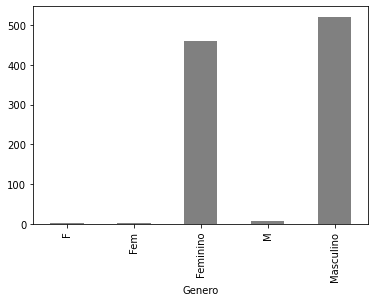

In [9]:
# gerando o grafico por genero
agrupado.plot.bar(color = 'gray')

In [10]:
# explorando colunas numericas
# score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

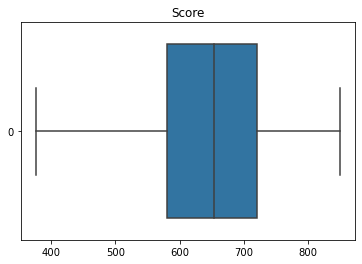

In [11]:
# visualizando os dados atraves boxplot
srn.boxplot(data=dataset['Score'], orient="h").set_title('Score')

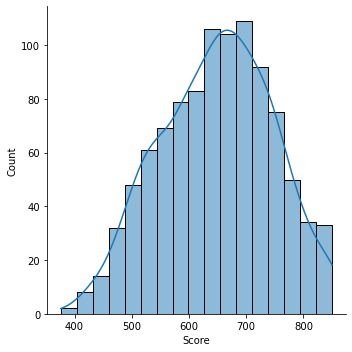

In [12]:
# visualizando os dados atraves do histograma
srn.displot(data=dataset['Score'], kde=True)

In [16]:
# idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

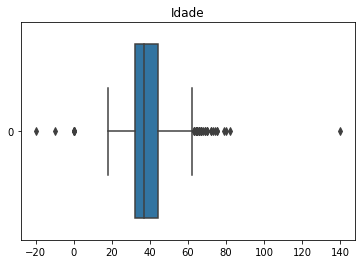

In [17]:
# visualizando os dados atraves do boxplot
srn.boxplot(data=dataset['Idade'], orient="h").set_title('Idade')

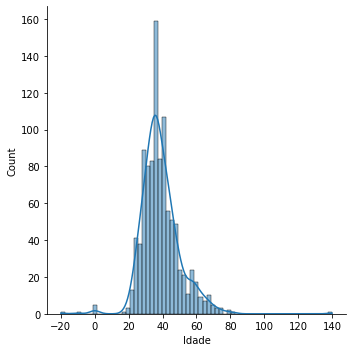

In [18]:
# visualizando os dados atraves do histograma
srn.displot(data=dataset['Idade'], kde=True)

In [19]:
# saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

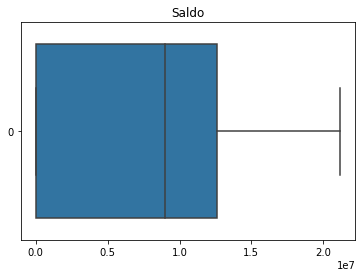

In [22]:
# visualizando os dados atraves do boxplot
srn.boxplot(data=dataset['Saldo'], orient="h").set_title('Saldo')

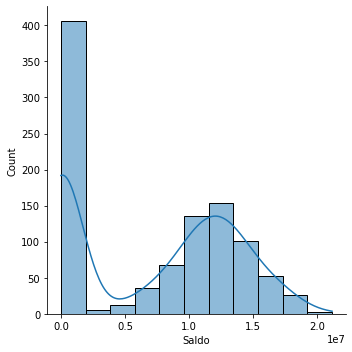

In [25]:
# visualizando dados com displot
srn.displot(data=dataset['Saldo'], kde=True)

In [23]:
# salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

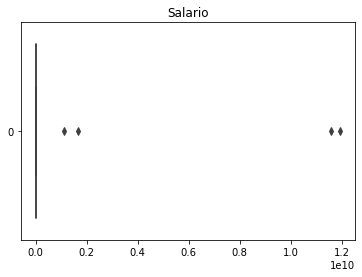

In [28]:
# visualizando dados com boxplot
srn.boxplot(data=dataset['Salario'], orient='h').set_title('Salario')

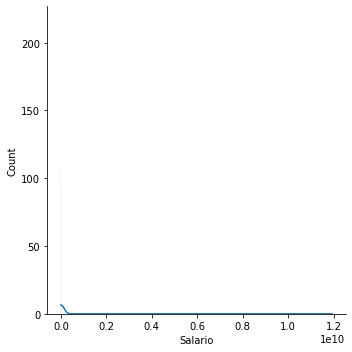

In [33]:
# visualizando dados com displot
srn.displot(data=dataset['Salario'], kde=True)

In [35]:
# contando valores NaN
# genero e salario
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

## Tratamento dos dados

In [36]:
# calculando a mediana dos salarios para substituir nos valores NaN
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [37]:
# substituindo os valores NaN pela mediana calculada acima
dataset['Salario'].fillna(mediana, inplace=True)

In [38]:
# verificando se há algum salario com valor NaN
dataset['Salario'].isnull().sum()

0

In [39]:
# genero, falta de padronização
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [41]:
# total de NaN genero
dataset['Genero'].isnull().sum()

8

In [42]:
# preencher os valores de NaN em genero, a moda por causa que a mais masculino
dataset['Genero'].fillna('Masculino', inplace=True)

In [43]:
# verificando total de NaN genero
dataset['Genero'].isnull().sum()

0

In [45]:
# padronizando o genero para masculino e feminino
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino' # dados da coluna genero for igual a 'M' da 
# coluna Genero sera igual  a Masculino
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'

In [47]:
# visualizando os dados de genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [48]:
# visualizando as idades
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [50]:
# visualizando as idades menor que 0 e maior que 120
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [51]:
# calcular a mediana da idade para substituir nos valores em inconformidade
mediana = sts.median(dataset['Idade'])
mediana

37

In [53]:
# substituindo os valores de idade em conformidade
# sintaxe para substituir - dataset.loc[(filtro), nome_coluna] = valor_a_substituir
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] >120), 'Idade'] = mediana

In [54]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] >120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [55]:
# dados duplicados, buscando pelo ID
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [56]:
# excluindo o dado duplicado
# sintaxe para substituir - dataset.drop_duplicates(subset='nome_coluna', keep='mantem_coluna', inplace=True)
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
# visualizando
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [57]:
# visualizando os estados
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [58]:
# substituindo os dados fora do dominio pela RS (moda - contem mais valores)
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()

In [59]:
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [60]:
# outliers salario, considerando dois desvios padrao
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [61]:
# checando se há salarios maior que 2 desvio padrão
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [62]:
# criando a mediana para atualizar o desvio padrao do salario
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [63]:
# substituindo os salarios que estão fora do desvio padrao
dataset.loc[dataset['Salario'] == 2 * desv, 'Salario'] = mediana
# checando se ha algum desvio padrao
dataset.loc[dataset['Salario'] == 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [71]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [73]:
dataset.shape

(998, 12)